<a href="https://colab.research.google.com/github/gb999/LuaLuaLua/blob/visualization/LuaLuaLua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the data

1. To download competition data from Kaggle the rules of the competition have to be accepted [here](https://www.kaggle.com/competitions/nlp-getting-started/data), by joining the competition.

2. After that, an API key has to be obtained.
Follow these [instructions](https://www.kaggle.com/docs/api) to do so.

3. Create a new secret named `kaggle.json` in Google Colab, copy the contents of the downloaded file into the value field. Enable Notebook access, and you are ready to go.





In [4]:
from google.colab import userdata
import json, os
kaggle_path = '/root/.config/kaggle'
kaggle_json = userdata.get('kaggle.json')
os.makedirs(kaggle_path, exist_ok=True)

with open(kaggle_path + '/kaggle.json', 'w') as f:
    f.write(kaggle_json)

os.chmod(kaggle_path + '/kaggle.json', 0o600)

In [5]:
!pip install kaggle --quiet
!kaggle competitions download -c nlp-getting-started -q
!unzip -o nlp-getting-started.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Visualization


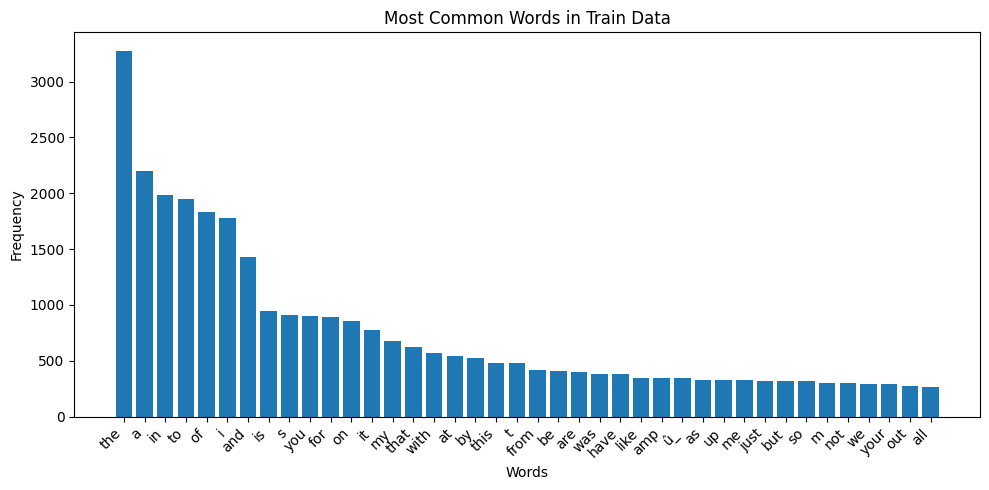

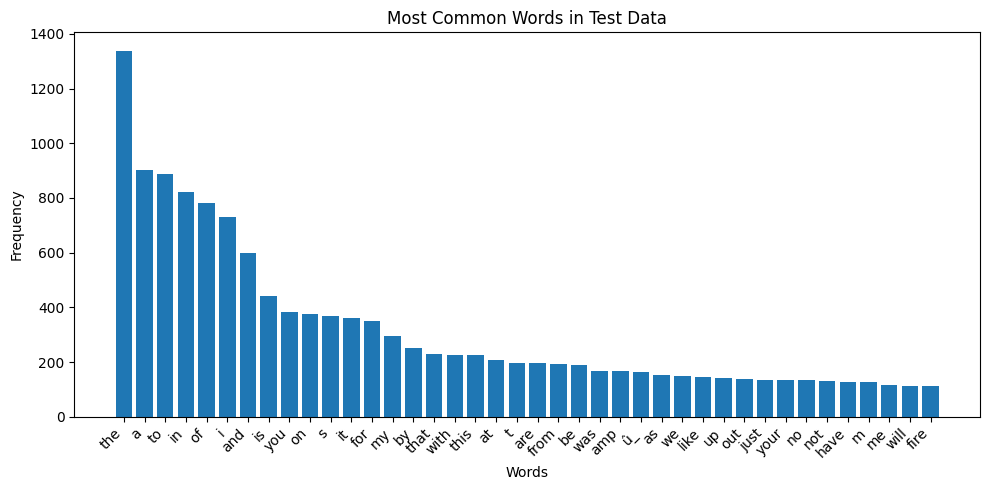

In [43]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

# Load DataFrames
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

def get_most_common_words(df, text_column, n=40):
    # Combine all text into a single string
    text = " ".join(df[text_column].astype(str).tolist())
    # Remove any special characters and split into words
    words = re.findall(r'\w+', text.lower())
    # Count the frequency of each word
    word_counts = Counter(words)
    # Get the n most common words
    return word_counts.most_common(n)

def plot_most_common_words(common_words, title):
  """Plots the most common words and their frequencies.

  Args:
    common_words: A list of tuples, where each tuple contains a word and its frequency.
    title: The title of the plot.
  """
  words, counts = zip(*common_words)  # Unzip the tuples
  plt.figure(figsize=(10, 5))  # Adjust figure size if needed
  plt.bar(words, counts)
  plt.title(title)
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping
  plt.show()

def remove_links(text):
  """Removes links from a text string.

  Args:
    text: The input text string.

  Returns:
    The text string with links removed.
  """
  # Remove links using regular expression
  text = re.sub(r'http\S+', '', text)
  return text

pd.set_option("display.max_colwidth", None)

# For train_df
#at_count_train = train_df['text'].str.count('@').sum()
#print(f"Number of '@' in train_df: {at_count_train}")

# For test_df
#at_count_test = test_df['text'].str.count('@').sum()
#print(f"Number of '@' in test_df: {at_count_test}")

# Filter for entries containing "@"
#at_entries = train_df[train_df['text'].str.contains('@')]

# Print the first 10 entries
#print(at_entries.head(10))

# Remove links from data
train_df['text'] = train_df['text'].apply(remove_links)
test_df['text'] = test_df['text'].apply(remove_links)

# Get most common words
train_common_words = get_most_common_words(train_df, 'text') # Updated column name
test_common_words = get_most_common_words(test_df, 'text') # Updated column name

# Diagrams
plot_most_common_words(train_common_words, "Most Common Words in Train Data")
plot_most_common_words(test_common_words, "Most Common Words in Test Data")

#print(train_df.iloc[7610])

#print(train_df)
#print(test_df.shape)
#print(train_df.iloc[40])

# Notes for visualization (THIS IS TEMPRARY, DO NOT MERGE WITH THIS!!!!)

## DONE
- display most common words
- remove links (words starting with http)

## TODO
- "û_" és "t" common words
- RT @ és @ words need handling



# Encoding the data
TODO: What, why how?

'so we download the stopwords. We do not know yet which version is gonna preform better, but we will test both with and without stopwords.'

In [ ]:
!pip install nltk --quiet
!pip install gensim --quiet

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

lines = train_df['text']
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_lines(lines, remove_stopwords=True, stop_words=set()):
  cleaned_lines = []
  for line in lines:
    words = re.findall(r"[A-Za-z]+", line.lower()) # Keep letters only

    if remove_stopwords:
      words = [word for word in words if word not in stop_words]

    cleaned_line = ' '.join(words)
    cleaned_lines.append(cleaned_line)

  return cleaned_lines


cleaned_lines = clean_lines(lines, True, stop_words)

print(cleaned_lines)

['deeds reason earthquake may allah forgive us', 'forest fire near la ronge sask canada', 'residents asked shelter place notified officers evacuation shelter place orders expected', 'people receive wildfires evacuation orders california', 'got sent photo ruby alaska smoke wildfires pours school', 'rockyfire update california hwy closed directions due lake county fire cafire wildfires', 'flood disaster heavy rain causes flash flooding streets manitou colorado springs areas', 'top hill see fire woods', 'emergency evacuation happening building across street', 'afraid tornado coming area', 'three people died heat wave far', 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding', 'raining flooding florida tampabay tampa days lost count', 'flood bago myanmar arrived bago', 'damage school bus multi car crash breaking', 'man', 'love fruits', 'summer lovely', 'car fast', 'goooooooaaaaaal', 'ridiculous', 'london cool', 'love skiing', 'wonderful day', 'loooo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!wget -nc -q http://nlp.stanford.edu/data/glove.6B.zip
!unzip -n glove.6B.zip

Archive:  glove.6B.zip


# TODO
Load GloVe model. This model is a simple word-vectorization model, whitch has a 50 long vector for each word.

In [ ]:
import numpy as np
# Returns a word-vector dictionary
def load_glove_model(file_path):
  glove_model = {}
  with open(file_path, 'r', encoding='utf-8') as f:
    # assign a vector to each word
    for line in f:
      values = line.split(' ')
      word = values[0]
      vector = np.asarray(values[1:], dtype='float32')
      glove_model[word] = vector
  return glove_model

glove_path = 'glove.6B.100d.txt'
glove_model = load_glove_model(glove_path)

# Get vector for word 'python'
print(glove_model['python'])
print(f"length: {len(glove_model['python'])}")

[ 0.24934    0.68318   -0.044711  -1.3842    -0.0073079  0.651
 -0.33958   -0.19785   -0.33925    0.26691   -0.033062   0.15915
  0.89547    0.53999   -0.55817    0.46245    0.36722    0.1889
  0.83189    0.81421   -0.11835   -0.53463    0.24158   -0.038864
  1.1907     0.79353   -0.12308    0.6642    -0.77619   -0.45713
 -1.054     -0.20557   -0.13296    0.12239    0.88458    1.024
  0.32288    0.82105   -0.069367   0.024211  -0.51418    0.8727
  0.25759    0.91526   -0.64221    0.041159  -0.60208    0.54631
  0.66076    0.19796   -1.1393     0.79514    0.45966   -0.18463
 -0.64131   -0.24929   -0.40194   -0.50786    0.80579    0.53365
  0.52732    0.39247   -0.29884    0.009585   0.99953   -0.061279
  0.71936    0.32901   -0.052772   0.67135   -0.80251   -0.25789
  0.49615    0.48081   -0.68403   -0.012239   0.048201   0.29461
  0.20614    0.33556   -0.64167   -0.64708    0.13377   -0.12574
 -0.46382    1.3878     0.95636   -0.067869  -0.0017411  0.52965
  0.45668    0.61041   -0.115